#**Import Library**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

#**Explorasi Data Analysis**

In [ ]:
df = pd.read_csv('dataset_buys_comp.csv')

In [ ]:
df. head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [ ]:
print(df['Buys_Computer'].value_counts())

Buys_Computer
1    669
0    331
Name: count, dtype: int64


Terlihat bahwa kolom target itu mengalami imbalanced data. Maka dari itu, dapat dilakukan sampling sebelum proses pelatihan.

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Income,0
Student,0
Credit_Rating,0
Buys_Computer,0


Tidak terdapat missing values pada data.

#**Preprocesing**

Melakukan label encoding pada data

In [ ]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

Mengecek distribusi data setelah encoding

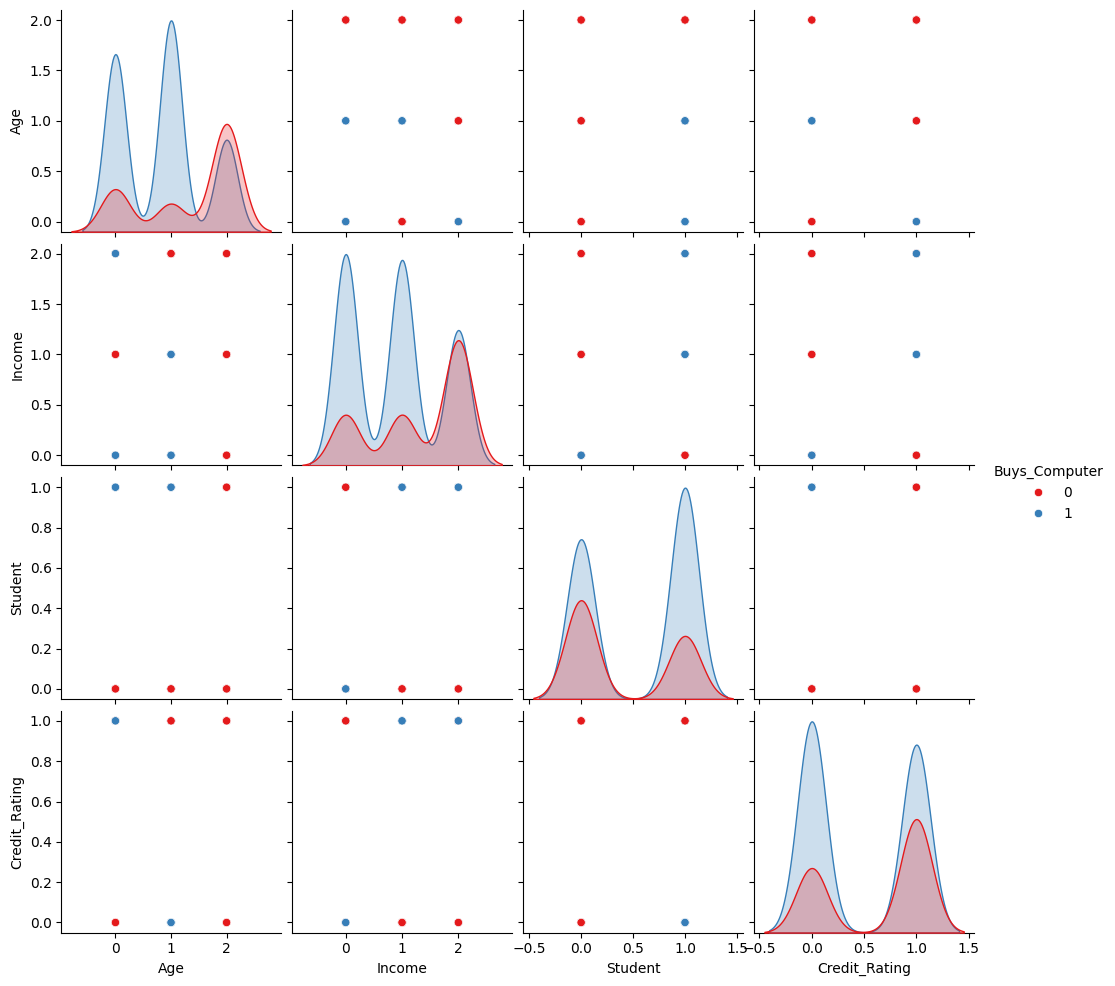

In [ ]:
sns.pairplot(df,hue='Buys_Computer',palette='Set1')

Melakukan Data Spliting

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Melakukan Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

#**Melakukan Pelatihan dan Evaluasi Model**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_oversampled, y_train_oversampled)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.8166666666666667
Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       101
           1       0.96      0.76      0.85       199

    accuracy                           0.82       300
   macro avg       0.81      0.84      0.81       300
weighted avg       0.86      0.82      0.82       300



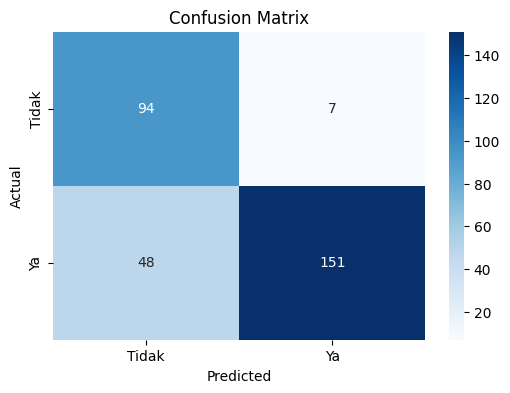

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak', 'Ya'], yticklabels=['Tidak', 'Ya'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Kesimpulan dari Hasil Evaluasi:**

Secara keseluruhan, model menunjukkan kemampuan untuk mengidentifikasi kelas "Ya" dengan cukup baik, tetapi memiliki kelemahan dalam mengidentifikasi kelas "Tidak" dan cenderung melakukan kesalahan *False Negative*.Hal ini ditunjukan oleh instance "ya" (True Positives = 151) dibandingkan dengan instance yang sebenarnya termasuk dalam kelas "Tidak" (True Negatives = 94).